HI, I am **Gautam kumar Jaiswal**. I am a student of IT in HMRITM, Delhi. This is My **Internship project** as a **Data Science & Bussiness Analytics Intern** at **The Spark Foundation**.

# Prediction using Unsupervised ML (Level - Beginner)

### Task: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [186]:
# Importing all the packages...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [187]:
# import the "Iris" Dataset...
iris_data = pd.read_csv("Iris.csv")

In [188]:
iris_data.head()     # show first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [189]:
iris_data.info()     # initialization
iris_data.describe()     # description of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


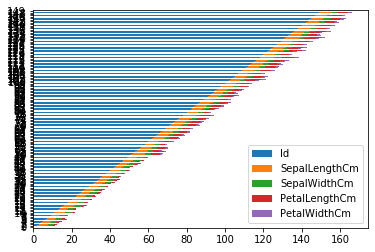

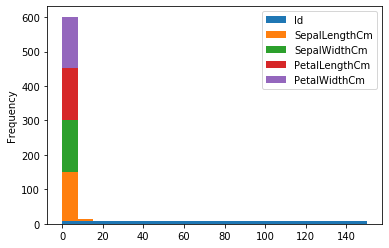

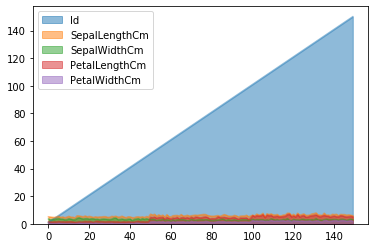

In [190]:
iris_df = pd.DataFrame(iris_data)  
iris_data.plot.barh(stacked=True)     # bar horizontal plotting
iris_data.plot.hist(stacked=True, bins=20)      # histogram plotting
iris_data.plot.area(stacked=False)     # plotting by area
plt.show()      # plotting of different columns of data

In [191]:
# substituting of data
iris_set = iris_df.iloc[:, [0, 1, 2, 3, 4]].values    # array converting
iris_set

array([[1.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01],
       [2.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01],
       [4.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01],
       [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
       [6.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01],
       [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01],
       [9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01],
       [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01],
       [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01],
       [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01],
       [1.50e+01, 5.80e+00, 4.00e+00, 1.20e+00, 2.00e-01],
       [1.60e+01, 5.70e+00, 4.40e+00, 1.50e+00, 4.00e-01],
       [1.70e+01, 5.40e+00, 3.90e+00, 1.30e+00, 4.00e-01

## Trainig model using Scikit-Learn K Means cluster algorithm.

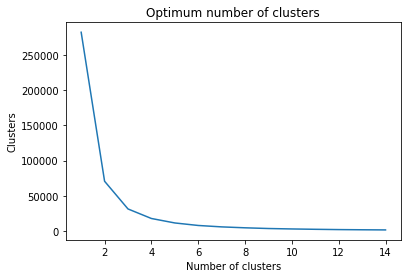

In [192]:
from sklearn .cluster import KMeans    # KMeans algoritm
clusters = []
for i in range(1, 15):      # defining the every column 
    kmeans = KMeans(n_clusters= i, init="k-means++", max_iter=100, random_state=25)
    kmeans.fit(iris_set)
    clusters.append(kmeans.inertia_)
plt.plot(range(1, 15), clusters)
plt.xlabel("Number of clusters")    # number of clusters(xlabel)
plt.ylabel("Clusters")      # per cluster(ylabel)
plt.title("Optimum number of clusters")
plt.show()       # show

In [193]:
cluster = KMeans(n_clusters = 10, init="k-means++", max_iter=100, random_state=25)
predict_clusters = cluster.fit_predict(iris_set)     # predict the main all clusters

### 2D Plotting of clustering.

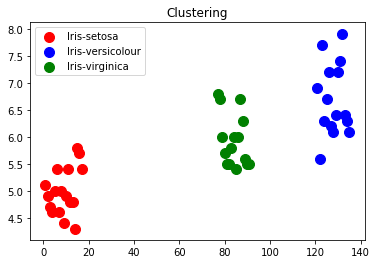

In [194]:
plt.scatter(iris_set[predict_clusters == 0, 0], iris_set[predict_clusters == 0, 1], 
                s = 100, c = "red", label = "Iris-setosa")
plt.scatter(iris_set[predict_clusters == 1, 0], iris_set[predict_clusters == 1, 1], 
                s = 100, c = "blue", label = "Iris-versicolour")
plt.scatter(iris_set[predict_clusters == 2, 0], iris_set[predict_clusters == 2, 1],
                s = 100, c = "green", label = "Iris-virginica")
plt.title("Clustering")
plt.legend()
plt.show()

### 3D Plotting of clustering.

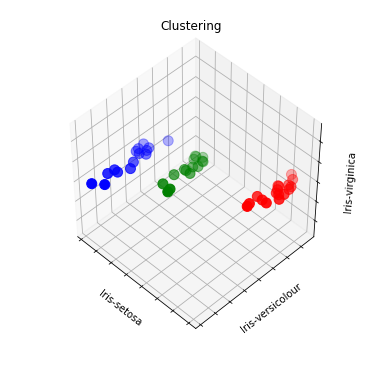

In [195]:
fignum = 1
fig = plt.figure(fignum, figsize=(6, 5))
ax= Axes3D(fig, rect=[0, 0, .85, 1], elev=48, azim=135)
ax.scatter3D(iris_set[predict_clusters == 0, 0], iris_set[predict_clusters == 0, 1], 
                s = 100, c = "red", label = "Iris-setosa")
ax.scatter3D(iris_set[predict_clusters == 1, 0], iris_set[predict_clusters == 1, 1], 
                s = 100, c = "blue", label = "Iris-versicolour")
ax.scatter3D(iris_set[predict_clusters == 2, 0], iris_set[predict_clusters == 2, 1],
                s = 100, c = "green", label = "Iris-virginica")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title("Clustering")
ax.set_xlabel("Iris-setosa")
ax.set_ylabel("Iris-versicolour")
ax.set_zlabel("Iris-virginica")
ax.dist = 12
plt.show()

**Author: Gautam Kumar Jaiswal**